In [1]:
%config Completer.use_jedi = False
# !jupyter nbextension enable varInspector/main

In [2]:
import numpy as np
import pandas as pd
import dataframe_image as dfi

from utils import load_revisions

from scipy.stats import mannwhitneyu, ttest_ind, stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Domain Dictionaries - Comparison

Domain specific dictionaries consist of words that have been extracted by using DidaxTo tool. These dictionaries are categorized as positive and negative based on the sentiment of the words. Besides that each pair of positive and negative dictionaries corresponds to a specific category of politicians, athletes and scientists.

The use of domain specific dictionaries helps us to research whether or not linguistic biases occur in Wikipedia's content.

In [3]:
with open("../data/pos_words_politics.txt", "r") as fileReader:
    positiveWordsForPoliticians = [line.strip() for line in fileReader.readlines()]

with open("../data/neg_words_politics.txt", "r") as fileReader:
    negativeWordsForPoliticians = [line.strip() for line in fileReader.readlines()]
    
with open("../data/pos_words_scientits.txt", "r") as fileReader:
    positiveWordsForScientists = [line.strip() for line in fileReader.readlines()]

with open("../data/neg_words_scientits.txt", "r") as fileReader:
    negativeWordsForScientists = [line.strip() for line in fileReader.readlines()]

with open("../data/pos_words_athletes.txt", "r") as fileReader:
    positiveWordsForAthletes = [line.strip() for line in fileReader.readlines()]

with open("../data/neg_words_athletes.txt", "r") as fileReader:
    negativeWordsForAthletes = [line.strip() for line in fileReader.readlines()]    

In [4]:
lengths = [[len(positiveWordsForPoliticians), 
           len(negativeWordsForPoliticians)], 
           [len(positiveWordsForScientists),
           len(negativeWordsForScientists)],
           [len(positiveWordsForAthletes),
           len(negativeWordsForAthletes)]]
index = ["Politicians", "Scientists", "Athletes"]
columns = ["NumOfPositiveWords", "NumOfNegativeWords"]

words = pd.DataFrame(data=lengths, index=index, columns=columns)
words

,NumOfPositiveWords,NumOfNegativeWords
Politicians,886,1340
Scientists,1145,1235
Athletes,634,418


In [5]:
# Uncomment the line below to export the above table to a svg format.
# dfi.export(words, "../images/numOfWordsTable.svg")

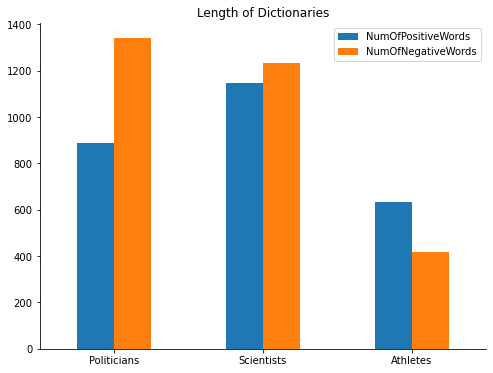

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

words.plot(kind="bar", ax=ax)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.xticks(rotation=0)
plt.legend()
plt.title("Length of Dictionaries")
# plt.savefig("../images/dictsOfAllCategories.pdf", bbox_inches="tight")
plt.show();

DidaxTo has extracted positive and negative words for each category. We can see that DidaxTo has extracted a large number of positive words from biographies related to scientists. Additionally, biographies related to politicians hold the largest number for negative words. Biographies that refer to athletes have more positive than negative words.

-----------

## Overview

In [7]:
revisions = pd.read_csv("../data/revisions.txt", index_col=0)
# revisions.describe()

In [8]:
# revisions.info()

In [9]:
# revisions.head(3)

In [10]:
mean_countsGenders = revisions.groupby("gender").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean"})
mean_countsGenders

,length,posWords,negWords,meanAbstractLevel
gender,,,,
f,2593.811981,311.850074,105.669788,3.676089
m,4451.313738,537.293602,180.936876,3.742337


In [11]:
mean_countsCategories = revisions.groupby("role").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean"})
mean_countsCategories

,length,posWords,negWords,meanAbstractLevel
role,,,,
athlete,707.302921,89.695873,19.491673,3.788462
politician,4773.913953,607.352842,200.539021,3.762077
scientist,2872.680475,306.691048,110.211393,3.651864


In [12]:
revisions.groupby(["role", "gender"])["name"].nunique()

role        gender
athlete     f         23
            m         25
politician  f         10
            m         12
scientist   f         29
            m         18
Name: name, dtype: int64

In [13]:
revisions.groupby("role")["name"].count()

role
athlete        4143
politician    38479
scientist     31212
Name: name, dtype: int64

## Users With Most Edits

In [14]:
mean_countsGenders = revisions.groupby("gender").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean"})
mean_countsGenders

,length,posWords,negWords,meanAbstractLevel
gender,,,,
f,2593.811981,311.850074,105.669788,3.676089
m,4451.313738,537.293602,180.936876,3.742337


**Mean values of the number of words, the number of positive, the number of negative words, and the mean abstratcion level for biographies related to females are all less than the corresponded mean values for biographies that refer to males. In section [X] we focus on mean abstraction level and investigate if this difference is significant or not.**

In [15]:
mean_countsCategories = revisions.groupby("role").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean"})
mean_countsCategories

,length,posWords,negWords,meanAbstractLevel
role,,,,
athlete,707.302921,89.695873,19.491673,3.788462
politician,4773.913953,607.352842,200.539021,3.762077
scientist,2872.680475,306.691048,110.211393,3.651864


**Mean values of the number of words, the number of positive, the number of negative words, and the mean abstratcion level for biographies distinguished by the role of each person. We see that there are differences on mean abstraction level across categories. In section [X] we investigate if these differences are significant with a confidence level of 95%.**

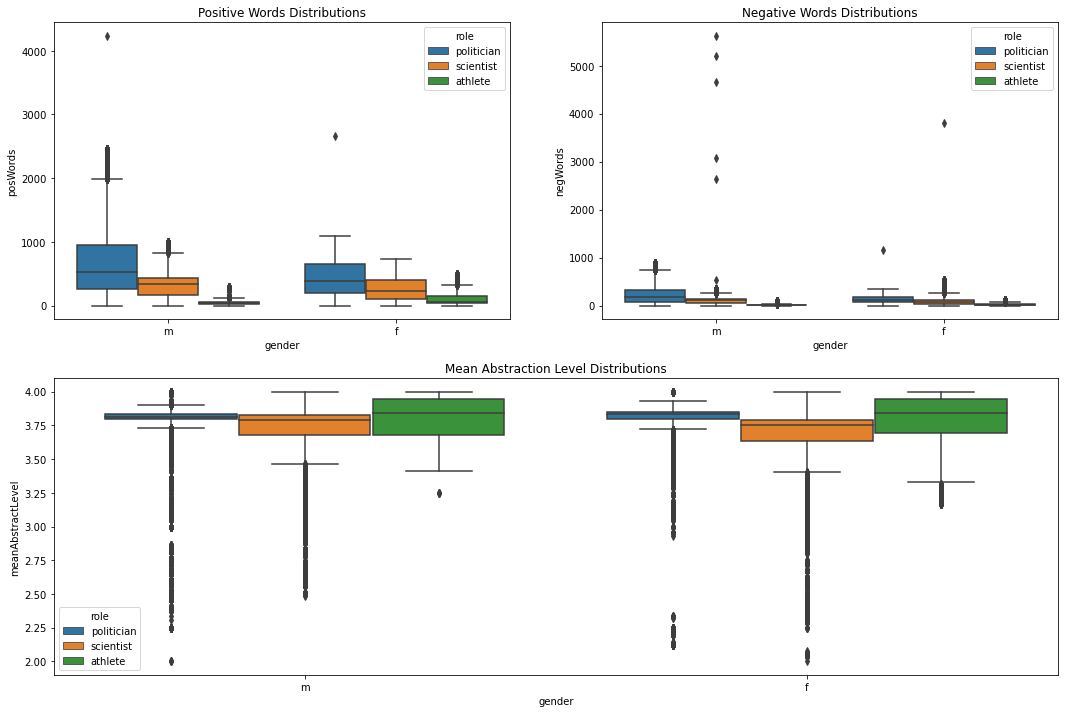

In [16]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(212)

sns.boxplot(data=revisions, y="posWords", x="gender", hue="role", ax=ax)
sns.boxplot(data=revisions, y="negWords", x="gender", hue="role", ax=ax1)
sns.boxplot(data=revisions, y="meanAbstractLevel", x="gender", hue="role", ax=ax2)

ax.set_title("Positive Words Distributions")
ax1.set_title("Negative Words Distributions")
ax2.set_title("Mean Abstraction Level Distributions")
# plt.savefig("../images/distributions.pdf", bbox_inches='tight')
plt.show();

## Users With Most Edits

In [17]:
users = revisions.groupby(["role", "userId"]).agg({"revId":"count"})
users.rename(columns={"revId":"NumOfEdits"}, inplace=True)

usersWithMostEdits = users["NumOfEdits"].groupby("role", group_keys=False).nlargest(5).to_frame()

usersWithMostEdits.reset_index(inplace=True)

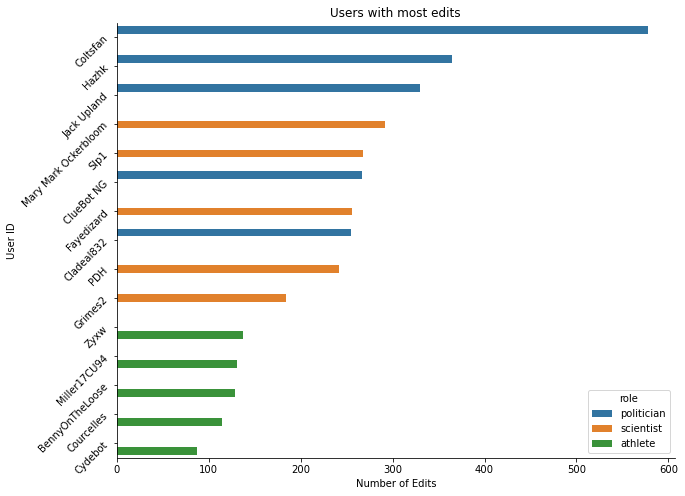

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

sns.barplot(data=usersWithMostEdits.sort_values(by="NumOfEdits", ascending=False), ax=ax, x="NumOfEdits", y="userId", hue="role", orient="h")
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.yticks(rotation=45)
plt.title("Users with most edits")
plt.xlabel("Number of Edits")
plt.ylabel("User ID")
# plt.savefig("../images/usersWithMostEditsV2.pdf", bbox_inches="tight")
plt.show();

## Common Editors

In [19]:
usersDF = revisions.set_index(keys=["userId", "role"])
usersDF.sort_index(inplace=True)

commonEditors = []
for editor in set(usersDF.index.get_level_values(0)):
    if len(usersDF.loc[editor]) >= 2:
        commonEditors.append(editor)
print(f"There are {len(set(commonEditors))} common editors across categories.")

There are 9265 common editors across categories.


## Revisions/ Edits with Strange Values

Edits with **Null** mean abstraction level values have been considered as strange. Due to the formula we have used to calculate mean abstraction level for each edit, if the denominator was 0 then we would got a null value. But for the denominator to be 0 means that we didn't have any of the extracted words into this edit.

In [20]:
revisionsWithStrangeValues = revisions.loc[revisions["meanAbstractLevel"].isnull()]

revisionsWithStrangeValues = revisionsWithStrangeValues.sort_values(by='length', ascending=False)

In [21]:
# Define paths to revisions files
politic_path = "../../../AI Lab-Research/Wikipedia Project/Data/politicians.json"
scientist_path = "../../../AI Lab-Research/Wikipedia Project/Data/most_influential_scientist_cleaned.json"
athletes_path = "../../../AI Lab-Research/Wikipedia Project/Data/athletsWithSixOlympicAppearances.json"
female_scientist_path = "../../../AI Lab-Research/Wikipedia Project/Data/notable_women_scientists.json"

In [22]:
%%capture
politicians_revisions = load_revisions(politic_path)
scientists_revisions = load_revisions(scientist_path)
scientists_female_revisions = load_revisions(female_scientist_path)
athletes_revisions = load_revisions(athletes_path)

In [23]:
overall_revisions = politicians_revisions
overall_revisions.update(scientists_revisions)
overall_revisions.update(scientists_female_revisions)
overall_revisions.update(athletes_revisions)

In [24]:
for tup in revisionsWithStrangeValues.itertuples():
    print(f"Biography Starts - Name {tup[1]}")
    print("-.-"*25)
    print(overall_revisions[tup[1]][str(tup[2])]["content"])
    print(f"Biography Ends - Name {tup[1]}")
    print("-+-"*25+"\n")

Biography Starts - Name Pierre Chambon
-.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.--.-
i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am vandal man i am 

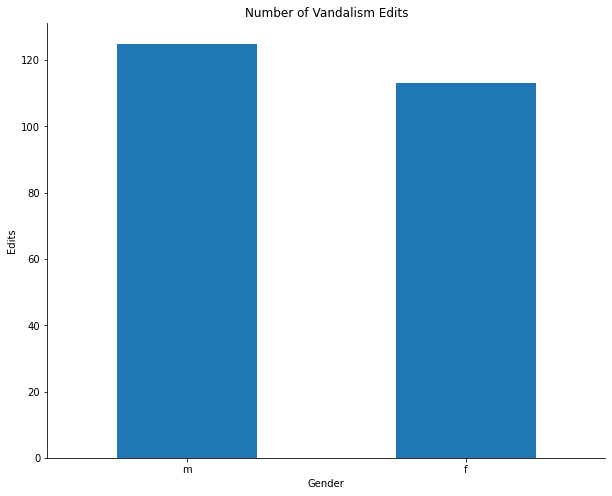

In [25]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

revisionsWithStrangeValues["gender"].value_counts().plot(kind="bar", ax=ax)
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.xticks(rotation=0)
plt.xlabel("Gender")
plt.ylabel("Edits")
plt.title("Number of Vandalism Edits")
# plt.savefig("../images/vandalisms.pdf", bbox_inches="tight")
plt.show();

In [26]:
counts = revisions.groupby("gender").agg({"name":"count"})
counts.rename(columns={"name":"counts"}, inplace=True)
counts.sort_values(by="counts", ascending=False, inplace=True)
counts["NumOfVandalEdits"] = revisionsWithStrangeValues["gender"].value_counts()
counts["ratio"] = (counts["NumOfVandalEdits"] / counts["counts"])*100
counts

,counts,NumOfVandalEdits,ratio
gender,,,
m,45640,125,0.273883
f,28194,113,0.400794


In [27]:
counts = revisions.groupby("gender").agg({"name":"count"})
counts.rename(columns={"name":"counts"}, inplace=True)
counts.sort_values(by="counts", ascending=False, inplace=True)
counts["NumOfVandalEdits"] = revisionsWithStrangeValues["gender"].value_counts()
counts["ratio"] = (counts["NumOfVandalEdits"] / counts["counts"])*100
counts

,counts,NumOfVandalEdits,ratio
gender,,,
m,45640,125,0.273883
f,28194,113,0.400794


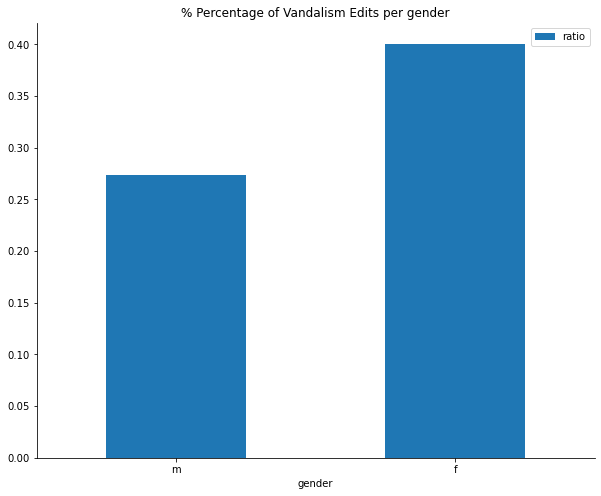

In [28]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

counts["ratio"].plot(kind="bar", ax=ax)
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.xticks(rotation=0)
plt.title("% Percentage of Vandalism Edits per gender")
plt.legend()
# plt.savefig("../images/ratioOfVandalisms.pdf", bbox_inches='tight')
plt.show();

Wikipedia is an open collaboratively encyclopedia and this way supports the diversity among opinions. But often this kind of collaborations leads to **Edit Wars**. Wikipedia holds a specific category of articles that are object of contradiction among editors. A sequence of an edit war usually starts after an editor edits the article or vandalizes it.

The above plots show the number of vandalism edits and the ratio of these edits per gender. There is a big difference between the two ratios and we observe that for females is much larger than for males. In section [X] we research whether this difference is significant or not.

----------

## Revisions With no Null Values

In [29]:
revisionsWithoutNullValues = revisions.copy().dropna()

revisionsWithoutNullValues.reset_index(drop=True, inplace=True)
revisionsWithoutNullValues["meanSubjectivityRatio"] = (revisionsWithoutNullValues.posWords+revisionsWithoutNullValues.negWords)/revisionsWithoutNullValues.length
revisionsWithoutNullValues.head()

,name,revId,userId,date,gender,role,length,posWords,negWords,descrVerbs,actionVerbs,stateVerbs,adjectives,meanAbstractLevel,meanSubjectivityRatio
0,Recep Tayyip Erdoğan,1969780,(,2003-11-23T15:02:33Z,m,politician,136,23,8,0,1,0,16,3.882353,0.227941
1,Recep Tayyip Erdoğan,2231561,141.156.44.81,2003-12-15T23:33:48Z,m,politician,236,37,10,0,2,0,15,3.764706,0.199153
2,Recep Tayyip Erdoğan,2389948,Nerval,2004-01-26T02:20:46Z,m,politician,241,37,10,0,2,0,15,3.764706,0.195021
3,Recep Tayyip Erdoğan,2464715,80.134.28.112,2004-02-14T14:08:18Z,m,politician,245,37,10,0,2,0,15,3.764706,0.191837
4,Recep Tayyip Erdoğan,2465011,Wik,2004-02-21T03:08:37Z,m,politician,250,37,10,0,2,0,15,3.764706,0.188000


In [30]:
index = revisionsWithoutNullValues["name"].value_counts().index

tmp_df = pd.DataFrame(columns=["name", "variance", "gender"])
for i in range(len(index)):
    name = index[i]
    gender = revisionsWithoutNullValues\
            .loc[revisionsWithoutNullValues["name"] == name]\
            .iloc[0]["gender"]
    rev0 = revisionsWithoutNullValues\
            .loc[revisionsWithoutNullValues["name"] == name]\
            .iloc[0]["meanAbstractLevel"]
    rev1 = revisionsWithoutNullValues\
            .loc[revisionsWithoutNullValues["name"] == name]\
            .iloc[-1]["meanAbstractLevel"]
    diff = rev1 - rev0
    tmp_df.loc[i] = [name, diff, gender]

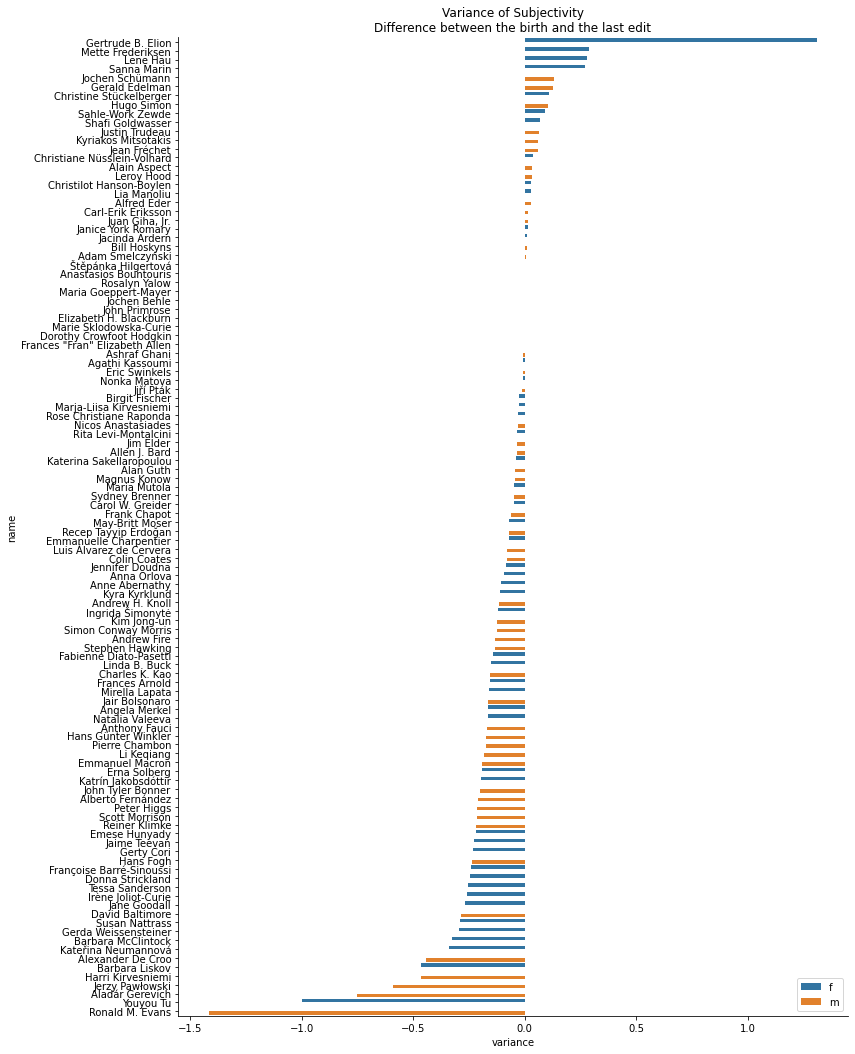

In [31]:
fig = plt.figure(figsize=(12,18))
ax = fig.add_subplot(111)

sns.barplot(data=tmp_df.sort_values(by="variance", ascending=False), y="name", 
            x="variance", hue="gender", 
            ax=ax, orient="h")

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.legend(loc=4)
plt.title("Variance of Subjectivity\nDifference between the birth and the last edit")
# plt.savefig("../images/varianceOfSubjectivity.jpg", bbox_inches="tight")
plt.show();

In [32]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)

# sns.histplot(data=revisionsWithoutNullValues, x="meanAbstractLevel", 
#              ax=ax, kde=True, hue="gender", alpha=0.4, 
#              bins=300)
# ax.spines["top"].set_color("None")
# ax.spines["right"].set_color("None")

# plt.title("Mean Abstaraction Level Histogram")
# plt.savefig("../images/meanAbstractLevelHistogram.jpg")
# plt.show();

In [33]:
revisionsWithoutNullValues_females = revisionsWithoutNullValues.loc[revisionsWithoutNullValues["gender"]=="f"]
revisionsWithoutNullValues_males = revisionsWithoutNullValues.loc[revisionsWithoutNullValues["gender"]=="m"]

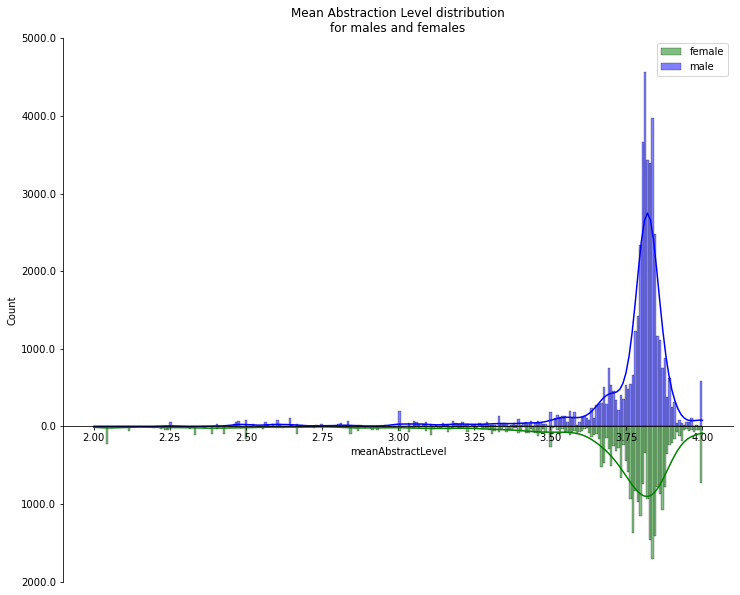

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(revisionsWithoutNullValues_females["meanAbstractLevel"], 
             kde=True, stat="count", bins=250,
             color='green', label="female")
for p in ax.patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in ax.lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

sns.histplot(revisionsWithoutNullValues_males["meanAbstractLevel"],
             kde=True, stat="count", bins=250,
             color='blue', label="male")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pos_ticks = np.array([t for t in ax.get_yticks() if t > 0])
ticks = np.concatenate([-pos_ticks[::-1], [0], pos_ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([f'{abs(t)}' for t in ticks])
ax.set_ylim(ymin=-2000, ymax=5000)
ax.spines['bottom'].set_position('zero')

plt.legend()
plt.title("Mean Abstraction Level distribution\nfor males and females")
# plt.savefig("../images/meanAbstractionLevelDistribution.pdf", bbox_inches='tight')
plt.show();

In [35]:
females = revisionsWithoutNullValues_females.groupby("name").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean",
                                 "meanSubjectivityRatio": "mean"})
males = revisionsWithoutNullValues_males.groupby("name").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean",
                                 "meanSubjectivityRatio": "mean"})

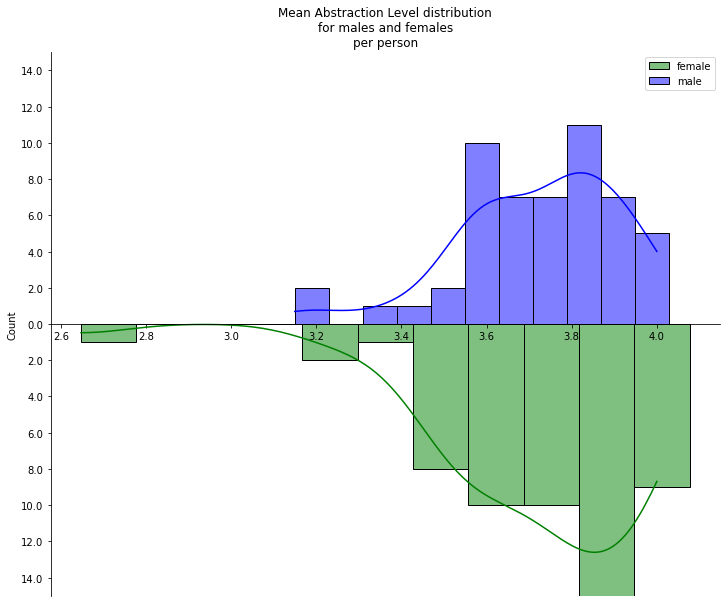

In [36]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(females["meanAbstractLevel"], 
             kde=True, stat="count", bins=10, binwidth=0.13,
             color='green', label="female")
for p in ax.patches:  # turn the histogram upside down
    p.set_height(-p.get_height())
for l in ax.lines:  # turn the kde curve upside down
    l.set_ydata(-l.get_ydata())

sns.histplot(males["meanAbstractLevel"],
             kde=True, stat="count", bins=10, binwidth=0.08,
             color='blue', label="male")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pos_ticks = np.array([t for t in ax.get_yticks() if t > 0])
ticks = np.concatenate([-pos_ticks[::-1], [0], pos_ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([f'{abs(t)}' for t in ticks])
ax.set_ylim(ymin=-15, ymax=15)
ax.spines['bottom'].set_position('zero')

plt.legend()
plt.title("Mean Abstraction Level distribution\nfor males and females\nper person")
ax.set_xlabel("")
# plt.savefig("../images/meanAbstractionLevelDistributionPerBiography.pdf", bbox_inches='tight')
plt.show();

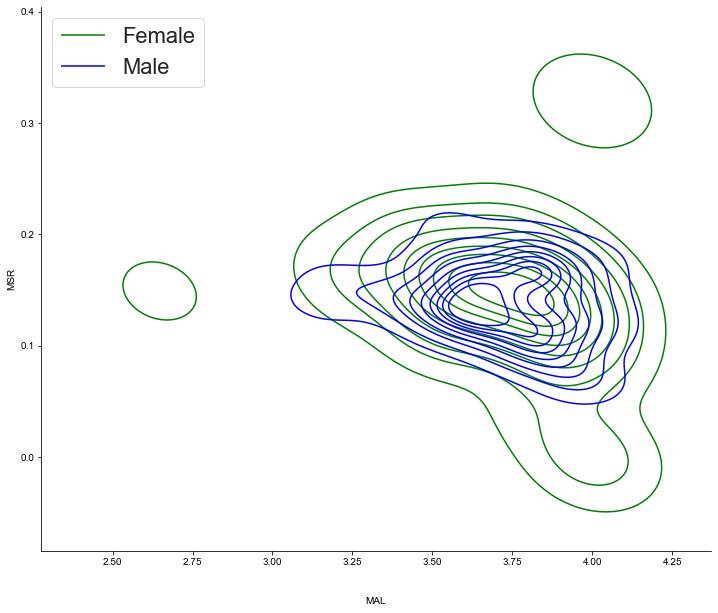

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.kdeplot(x=females["meanAbstractLevel"], y=females["meanSubjectivityRatio"],
             color='green', label="Female")
sns.kdeplot(x=males["meanAbstractLevel"], y=males["meanSubjectivityRatio"],
             color='blue', label="Male")

sns.set(font_scale=2)
sns.set_style("white")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc="upper left")
ax.set_xlabel("MAL", labelpad=30)
ax.set_ylabel("MSR")
# plt.savefig("../images/msr-kde.pdf", bbox_inches='tight')
plt.show();

In [38]:
revisionsWithoutNullValues.groupby("role").agg({"length":"mean",
                                 "posWords":"mean",
                                 "negWords":"mean",
                                 "meanAbstractLevel":"mean"})

,length,posWords,negWords,meanAbstractLevel
role,,,,
athlete,709.170136,89.934656,19.543320,3.788462
politician,4781.150856,608.380122,200.873562,3.762077
scientist,2885.253398,308.278454,110.628857,3.651864
